In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

## Settings and helper functions

In [29]:
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(rc={'figure.figsize':(20,10)})

In [43]:
def print_metrics(y_true, y_pred):
    '''
    Prints regression metrics
    '''
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print("---> MAE: {}".format(mae))
    print("---> MSE: {}".format(mse))
    print("---> RMSE: {}".format(np.sqrt(mse)))

## Loading data and EDA

In [5]:
data = fetch_california_housing()

In [8]:
X, y = data.data, data.target
X = pd.DataFrame(X, columns=data.feature_names)
y = pd.DataFrame(y, columns=data.target_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [9]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


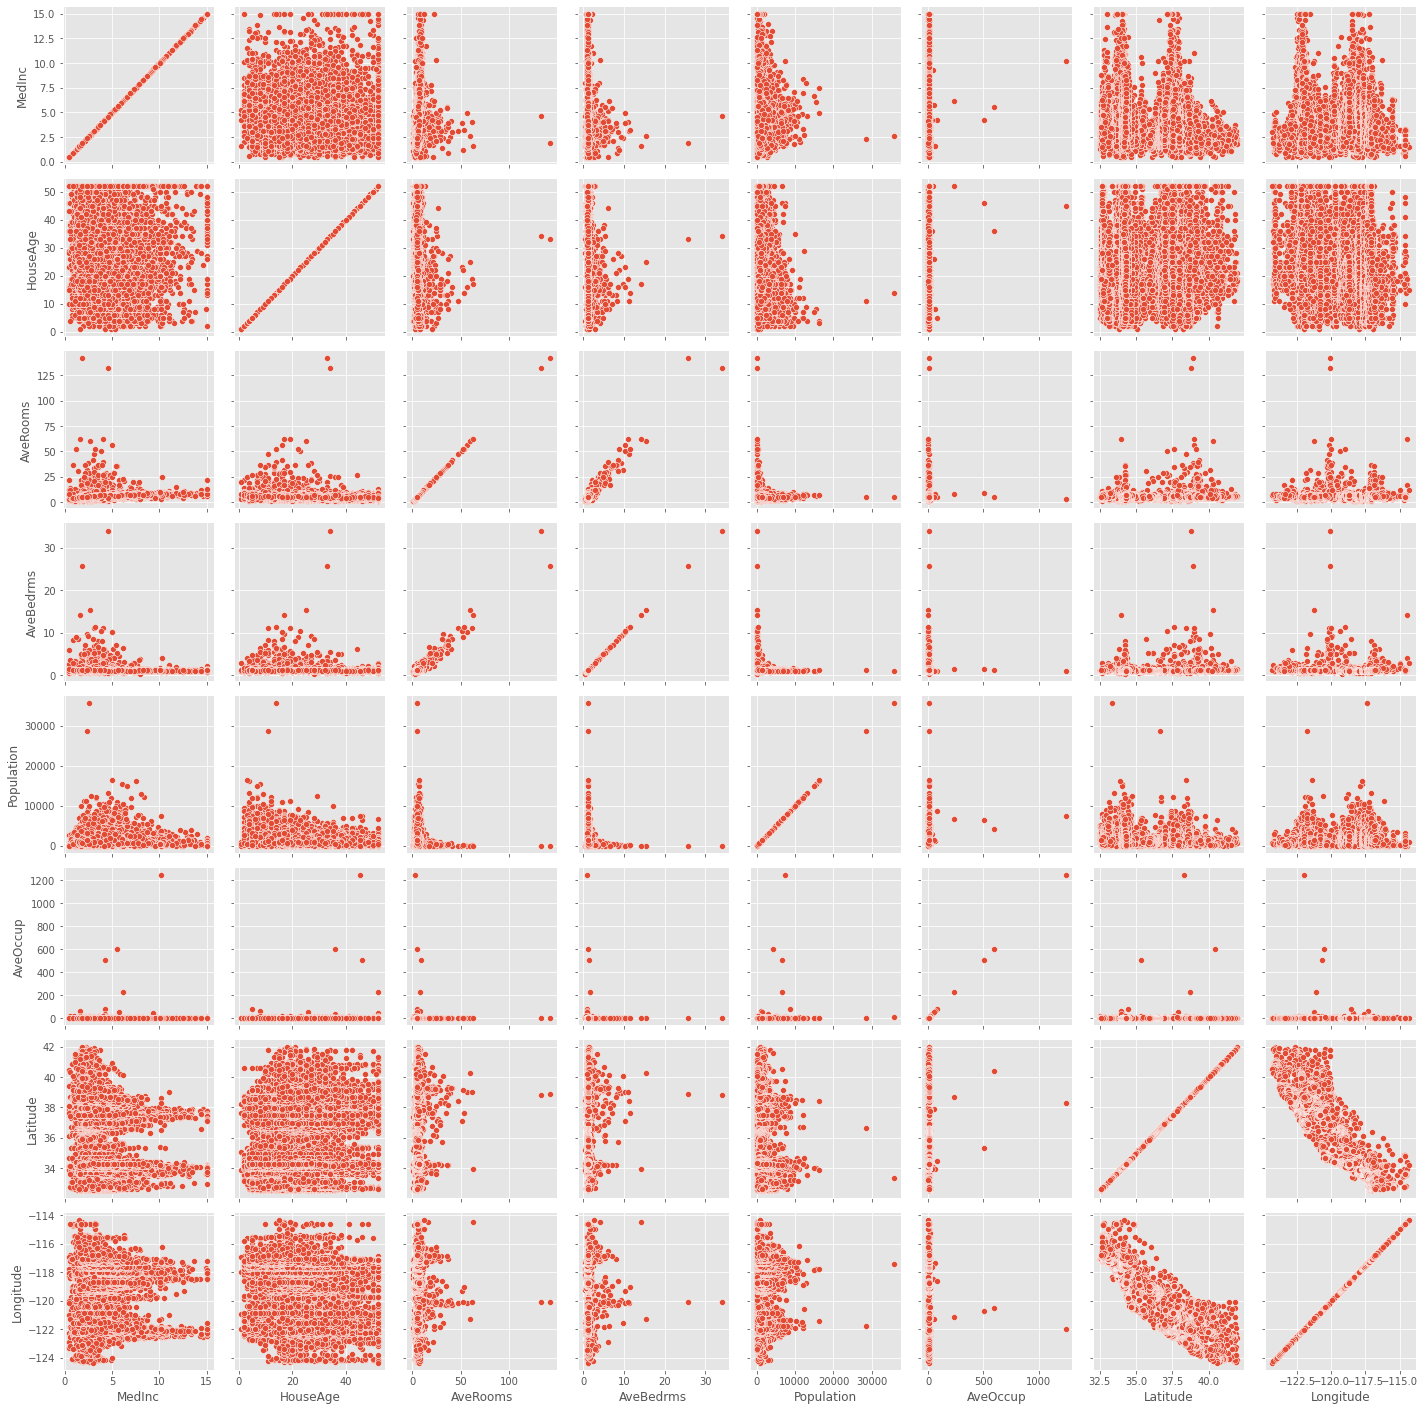

In [18]:
g = sns.PairGrid(X)
g.map(sns.scatterplot)

<AxesSubplot:xlabel='HouseAge', ylabel='MedInc'>

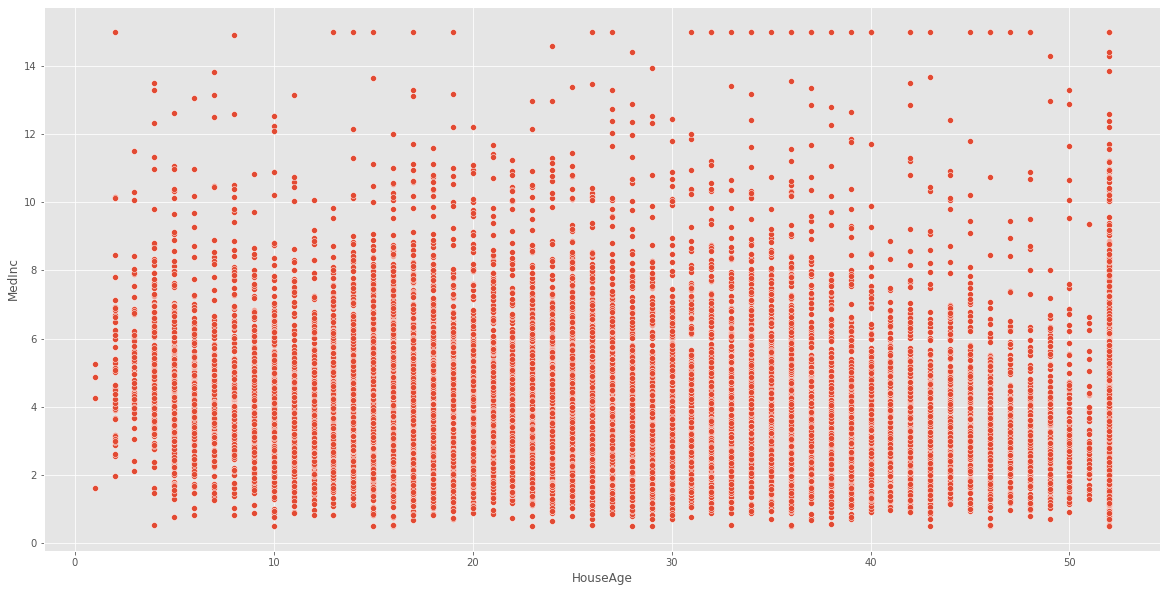

In [23]:
sns.scatterplot(x=X.HouseAge, y=X.MedInc)

<AxesSubplot:xlabel='MedInc', ylabel='Population'>

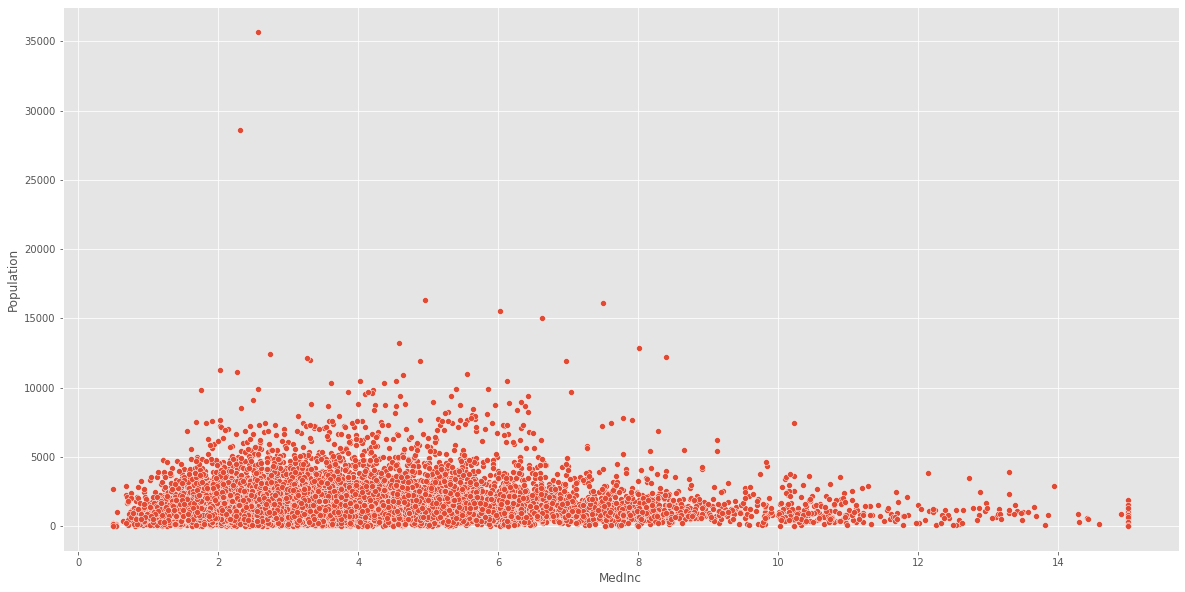

In [24]:
sns.scatterplot(x=X.MedInc, y=X.Population)

<AxesSubplot:xlabel='AveRooms', ylabel='AveBedrms'>

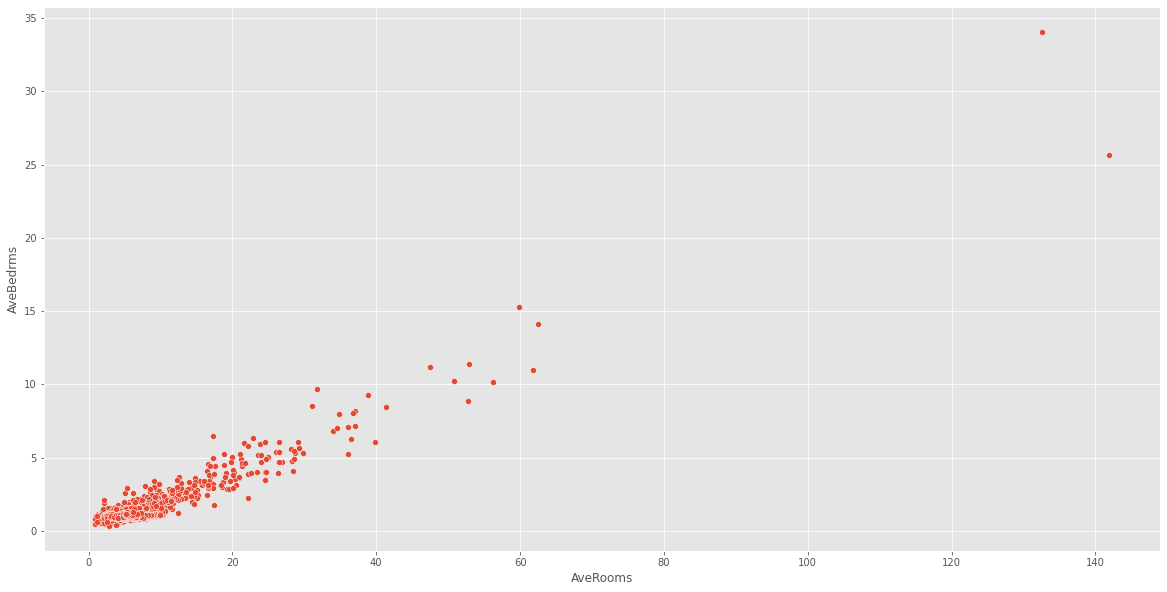

In [25]:
sns.scatterplot(x=X.AveRooms, y=X.AveBedrms)

<AxesSubplot:xlabel='AveRooms', ylabel='Population'>

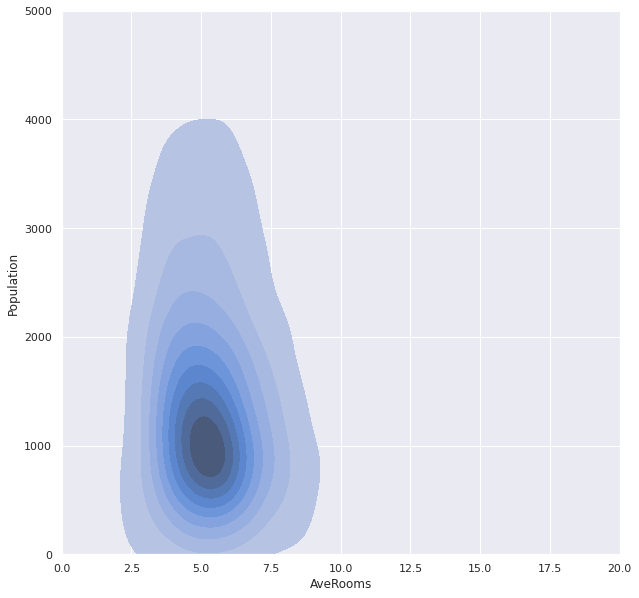

In [74]:
plt.figure(figsize=(10,10))
sns.kdeplot(x=X.AveRooms, y=X.Population, clip=[(0,20), (0,5000)], shade=True)

<AxesSubplot:xlabel='HouseAge', ylabel='Population'>

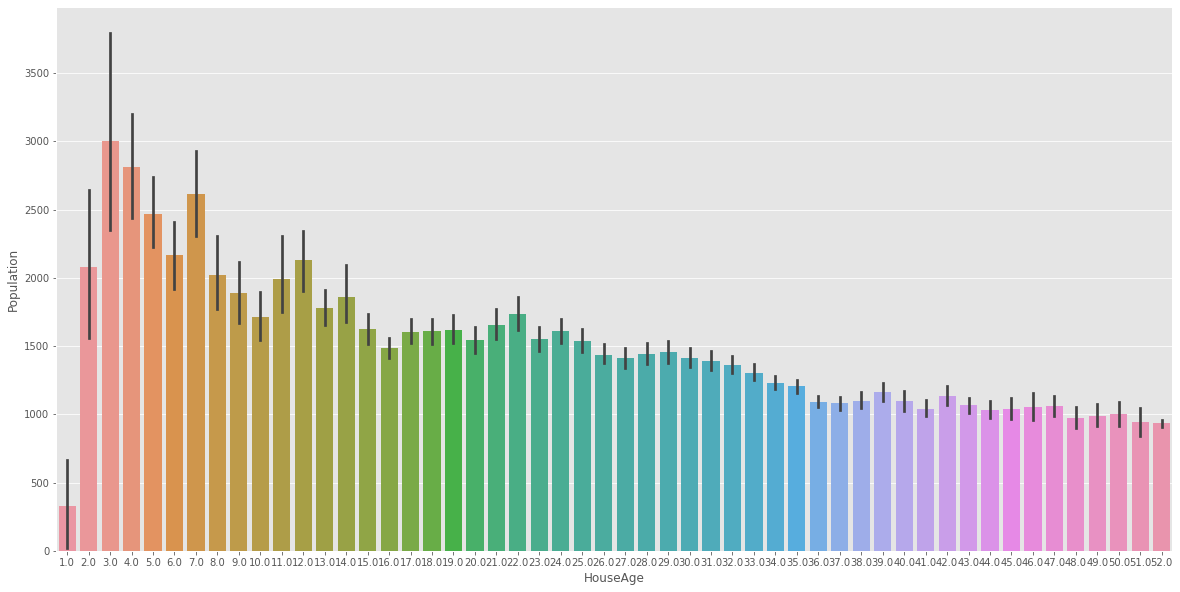

In [15]:
plt.figure(figsize=(20,10))
sns.barplot(x=X.HouseAge, y=X.Population)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

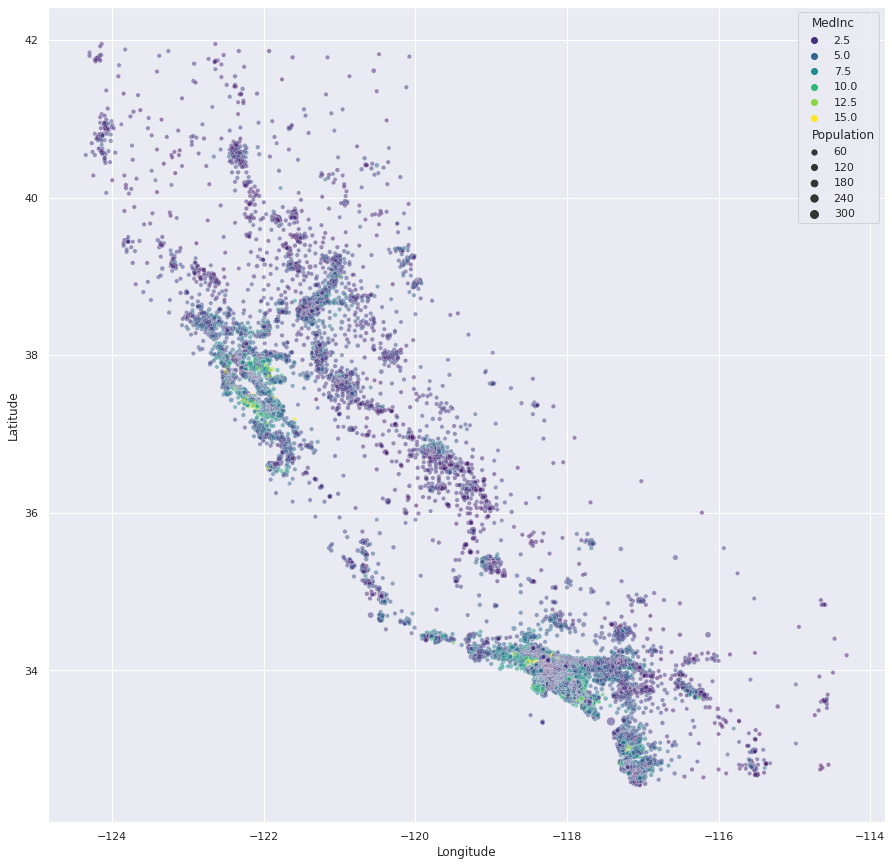

In [57]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=X.Longitude, y=X.Latitude, size=X.Population/100, hue=X.MedInc, palette='viridis', alpha=.5)

<AxesSubplot:>

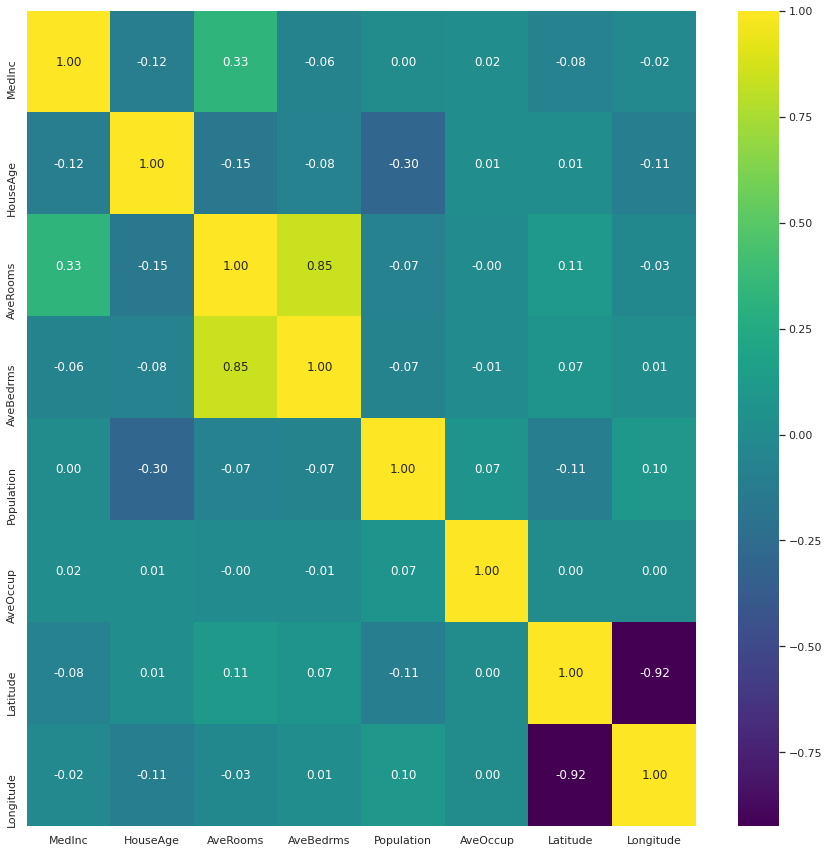

In [46]:
corr = X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='viridis', annot=True, fmt='.2f')

## Feature Engineering

## Inference

In [37]:
transformer = StandardScaler()
X_scaled = pd.DataFrame(transformer.fit_transform(X), columns=X.columns)
X_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


In [40]:
X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [44]:
lr = Lasso(random_state=42)
lr.fit(X_train_s, y_train)
yhat = lr.predict(X_test_s)
print_metrics(y_test, yhat)

---> MAE: 0.9060685490007149
---> MSE: 1.3106960720039365
---> RMSE: 1.1448563543099792


## Evaluation